<a href="https://colab.research.google.com/github/sameer786999/PRODIGY_DS_04/blob/main/Prodigy_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("twitter_validation.csv")
df.head()

,TweetId,Companyname,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TweetId      1000 non-null   int64 
 1   Companyname  1000 non-null   object
 2   Sentiment    1000 non-null   object
 3   Tweet        1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


1000

In [ ]:
tweet_counts = df['TweetId'].value_counts().reset_index()
tweet_counts.columns = ['TweetId', 'Count']

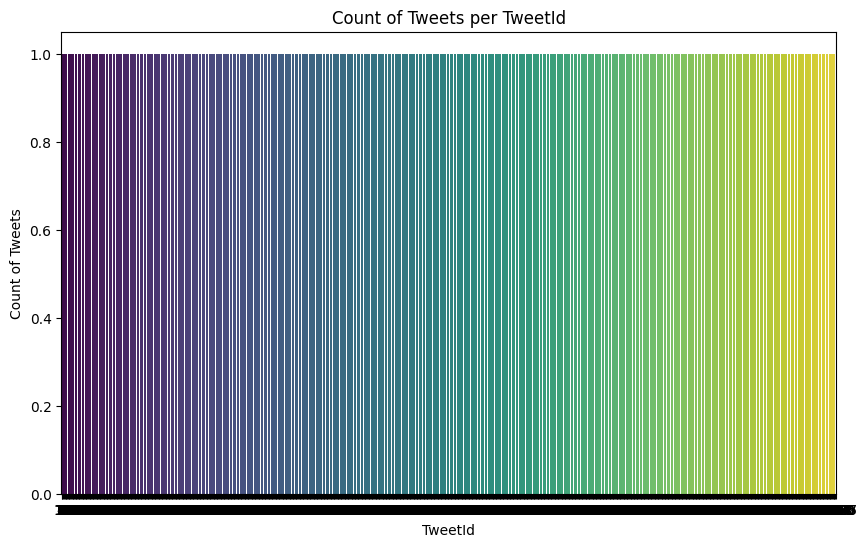

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TweetId', y='Count', data=tweet_counts, palette='viridis')
plt.xlabel('TweetId')
plt.ylabel('Count of Tweets')
plt.title('Count of Tweets per TweetId')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( df['TweetId'],df['Sentiment'], random_state=42, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score


In [ ]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[9.8600e+02 2.1650e+03 6.8900e+02 5.1820e+03 1.5290e+03 5.4540e+03
 2.8700e+02 3.6210e+03 1.2664e+04 6.2730e+03 1.1710e+03 1.2946e+04
 1.5890e+03 1.1567e+04 3.0840e+03 2.2490e+03 9.9910e+03 1.0188e+04
 3.4490e+03 1.0280e+04 8.6170e+03 1.1577e+04 1.1760e+04 1.1941e+04
 3.9400e+02 2.0690e+03 1.1753e+04 2.4140e+03 4.1770e+03 9.7000e+02
 1.1033e+04 7.3650e+03 7.9500e+03 2.8970e+03 9.5060e+03 7.3660e+03
 4.3670e+03 3.5320e+03 6.8960e+03 2.3360e+03 9.5720e+03 4.4710e+03
 7.6180e+03 7.5470e+03 4.6500e+03 4.3060e+03 1.1046e+04 8.1510e+03
 1.1332e+04 6.5600e+03 4.8510e+03 9.3880e+03 9.8700e+02 9.4670e+03
 1.6050e+03 3.5300e+02 3.6020e+03 7.6310e+03 2.7520e+03 8.9900e+03
 6.7180e+03 7.6890e+03 2.7030e+03 1.1824e+04 2.7090e+03 4.9360e+03
 1.2681e+04 8.3430e+03 1.0370e+04 1.1551e+04 4.4380e+03 2.5320e+03
 2.5730e+03 2.3840e+03 1.0121e+04 1.1962e+04 8.4080e+03 4.8400e+03
 3.0000e+02 9.6190e+03 1.2714e+04 9.4150e+03 2.1600e+03 9.4370e+03
 3.3640e+03 1.1533e+04 8.7280e+03 4.3770e+03 6.6400e+03 8.9980e+03
 1.2541e+04 5.5360e+03 5.0750e+03 8.4380e+03 7.8290e+03 1.4740e+03
 5.8320e+03 6.9170e+03 5.4480e+03 6.2190e+03 1.1536e+04 3.3310e+03
 5.7560e+03 7.7400e+03 1.1388e+04 1.7010e+03 1.0091e+04 4.1860e+03
 8.3730e+03 2.2180e+03 1.1149e+04 1.0719e+04 6.0560e+03 6.7150e+03
 9.3500e+03 1.0193e+04 6.4070e+03 3.8010e+03 3.7270e+03 2.4800e+03
 8.4860e+03 5.0250e+03 6.4080e+03 3.4870e+03 7.9250e+03 6.5830e+03
 2.6000e+03 8.3670e+03 1.2444e+04 2.4500e+03 2.3350e+03 3.7290e+03
 1.1852e+04 3.3290e+03 4.2910e+03 6.8910e+03 5.3280e+03 1.0185e+04
 1.1504e+04 3.5580e+03 1.0568e+04 9.2680e+03 5.1500e+02 1.0078e+04
 7.4440e+03 1.7250e+03 6.9920e+03 9.4520e+03 5.9840e+03 2.6520e+03
 5.2600e+02 8.9700e+03 9.2290e+03 4.0400e+03 6.2000e+02 1.9010e+03
 6.2720e+03 1.0695e+04 1.0275e+04 6.0860e+03 6.3230e+03 1.2469e+04
 5.9650e+03 5.6880e+03 9.5300e+02 8.0000e+01 5.3130e+03 1.8220e+03
 4.6260e+03 3.7230e+03 1.0537e+04 1.0102e+04 7.8520e+03 8.6640e+03
 7.6350e+03 1.0444e+04 1.2487e+04 1.1480e+03 4.3730e+03 6.9610e+03
 2.8570e+03 7.4460e+03 3.2770e+03 6.9490e+03 1.1310e+03 1.1783e+04
 6.6100e+03 1.3074e+04 1.0162e+04 7.6640e+03 7.3490e+03 5.0410e+03
 1.1957e+04 9.6570e+03 9.6660e+03 4.3340e+03 4.3330e+03 4.6970e+03
 1.0429e+04 8.5500e+02 3.4050e+03 9.6640e+03 9.4950e+03 1.4950e+03
 6.9530e+03 3.7200e+03 7.7260e+03 9.6340e+03 1.0082e+04 1.1107e+04
 8.6100e+02 3.4880e+03 6.4660e+03 1.0309e+04 5.1490e+03 7.8300e+02
 1.1685e+04 7.4060e+03 3.1690e+03 1.3012e+04 6.4960e+03 3.9290e+03
 1.3033e+04 1.1175e+04 6.4040e+03 7.5160e+03 5.0680e+03 1.1900e+04
 1.4390e+03 4.7610e+03 9.9660e+03 2.0570e+03 1.1720e+03 1.1106e+04
 6.6190e+03 3.1600e+02 2.2160e+03 1.0933e+04 1.1331e+04 3.8380e+03
 4.8650e+03 2.9940e+03 1.1505e+04 1.1693e+04 9.1160e+03 5.1540e+03
 1.2409e+04 8.1840e+03 4.2350e+03 5.5980e+03 9.9400e+03 4.3430e+03
 1.4480e+03 1.0880e+03 1.2809e+04 2.0100e+02 1.0694e+04 9.0630e+03
 1.6940e+03 1.7520e+03 4.8950e+03 1.0461e+04 9.1050e+03 9.1350e+03
 1.2700e+02 3.4020e+03 8.3710e+03 1.0670e+04 3.1080e+03 2.2860e+03
 1.0223e+04 2.7900e+02 6.8530e+03 1.5650e+03 3.4500e+02 2.3750e+03
 9.4940e+03 4.4530e+03 6.1640e+03 6.3800e+02 5.6000e+02 1.9080e+03
 6.6580e+03 7.0040e+03 2.0490e+03 1.2565e+04 1.2200e+02 1.7100e+02
 1.3160e+04 9.1450e+03 1.2030e+03 1.2987e+04 1.1006e+04 1.1417e+04
 9.6000e+01 1.1755e+04 2.0150e+03 7.8010e+03 7.2590e+03 1.0729e+04
 9.1490e+03 2.1950e+03 1.1306e+04 8.6970e+03 4.0180e+03 8.3050e+03
 1.0722e+04 7.0190e+03 5.2070e+03 7.5060e+03 1.1328e+04 6.9600e+03
 2.1800e+02 4.0900e+03 4.1000e+02 8.0000e+02 7.3060e+03 2.7510e+03
 3.3610e+03 4.3130e+03 1.0262e+04 2.7130e+03 1.6800e+02 9.4880e+03
 8.7160e+03 1.0849e+04 5.4730e+03 2.4570e+03 2.1900e+03 2.0140e+03
 6.2910e+03 8.0560e+03 1.4250e+03 5.6410e+03 1.0644e+04 5.2120e+03
 3.7640e+03 7.2600e+02 8.0700e+02 9.4730e+03 6.0380e+03 1.8570e+03
 1.1544e+04 1.1633e+04 7.5750e+03 1.1248e+04 1.4310e+03 5.4550e+03
 7.8480e+03 1.1610e+04 3.0680e+03 8.9840e+03 1.2210e+03 1.2480e+04
 1.2456e+04 1.2600e+02 1.0422e+04 5.1220e+03 1.3158e+04 5.3330e+03
 3.6170e+03 6.3530e+03 9.7900e+02 5.0830e+03 1.1155e+04 3.3530e+03
 1.1431e+04 6.1870e+03 1.3730e+03 1.1378e+04 1.1653e+04 7.7500e+02
 1.7830e+03 1.1240e+04 4.8220e+03 6.8380e+03 2.2740e+03 8.3180e+03
 6.5930e+03 1.5860e+03 4.9510e+03 6.7720e+03 1.2792e+04 5.9210e+03
 1.5820e+03 7.2510e+03 1.1995e+04 6.7500e+03 9.8000e+02 8.3770e+03
 8.9170e+03 3.4310e+03 1.2997e+04 2.7690e+03 3.5250e+03 1.0406e+04
 6.2970e+03 1.0889e+04 5.0480e+03 1.0986e+04 4.9740e+03 1.3180e+03
 1.6600e+02 1.0008e+04 1.0646e+04 5.7110e+03 2.6950e+03 1.2640e+03
 7.2130e+03 7.3900e+02 6.2180e+03 1.0888e+04 3.1400e+02 1.0080e+04
 5.2650e+03 5.5050e+03 1.2000e+01 8.8220e+03 5.5680e+03 1.1465e+04
 1.0498e+04 1.3107e+04 5.8880e+03 6.8900e+03 3.0830e+03 6.3790e+03
 3.1480e+03 1.0844e+04 1.0602e+04 1.0027e+04 1.6190e+03 1.2831e+04
 6.0980e+03 1.1070e+03 6.3610e+03 1.0589e+04 1.2720e+04 9.0890e+03
 2.5470e+03 9.6610e+03 1.3150e+04 7.5810e+03 2.0980e+03 1.0748e+04
 5.1920e+03 7.9500e+02 1.0271e+04 2.9350e+03 1.2493e+04 1.0268e+04
 6.0400e+02 2.6030e+03 9.0540e+03 1.1440e+04 2.1030e+03 9.6970e+03
 8.0420e+03 1.0906e+04 2.2550e+03 7.9550e+03 5.4790e+03 3.6400e+02
 7.1000e+02 4.8210e+03 6.5860e+03 9.7660e+03 1.9670e+03 7.0690e+03
 1.1565e+04 1.0021e+04 1.0708e+04 7.7330e+03 1.0596e+04 6.4310e+03
 7.8790e+03 6.1370e+03 3.9930e+03 6.3390e+03 7.8350e+03 9.0390e+03
 6.1600e+02 2.5920e+03 7.2670e+03 7.1200e+02 6.1850e+03 9.8200e+03
 1.0555e+04 7.2050e+03 3.6450e+03 5.3300e+02 5.9990e+03 4.5330e+03
 5.6810e+03 3.2540e+03 1.0544e+04 6.8770e+03 6.0550e+03 9.1020e+03
 7.3820e+03 1.9610e+03 3.0570e+03 9.5330e+03 1.9540e+03 9.8640e+03
 3.0800e+03 5.8600e+02 1.0315e+04 4.4160e+03 7.9470e+03 6.7870e+03
 3.2060e+03 1.1590e+04 3.0370e+03 1.0558e+04 1.3720e+03 8.1800e+02
 9.8070e+03 1.2689e+04 7.2490e+03 3.1900e+02 1.0520e+04 6.6400e+02
 1.8040e+03 1.0350e+03 1.2725e+04 8.9730e+03 1.2582e+04 9.2100e+02
 4.7980e+03 9.8950e+03 6.2800e+03 9.5080e+03 8.1310e+03 9.6750e+03
 3.4560e+03 2.7850e+03 3.6390e+03 7.6170e+03 6.3560e+03 1.0412e+04
 1.0778e+04 5.1900e+02 4.9050e+03 3.3140e+03 9.8360e+03 1.1615e+04
 3.2290e+03 1.5050e+03 6.8500e+03 1.2554e+04 8.1700e+03 4.5540e+03
 8.1300e+02 8.7180e+03 4.1320e+03 8.3300e+02 1.0007e+04 1.1977e+04
 6.3400e+03 2.3370e+03 6.9770e+03 2.5270e+03 9.5950e+03 4.5690e+03
 1.1613e+04 1.0307e+04 6.0290e+03 4.9300e+02 9.4560e+03 7.2810e+03
 1.8230e+03 4.9980e+03 5.6800e+02 3.9120e+03 1.2514e+04 6.9060e+03
 1.1869e+04 1.1030e+03 1.0095e+04 9.7920e+03 1.0598e+04 4.2750e+03
 1.4980e+03 9.3530e+03 4.4330e+03 4.8940e+03 5.3120e+03 2.6530e+03
 3.5400e+02 8.3200e+02 1.0320e+03 6.6460e+03 8.3600e+03 3.5260e+03
 4.7000e+03 8.9430e+03 4.0200e+03 8.3490e+03 7.1080e+03 7.0480e+03
 7.0240e+03 3.8980e+03 5.3010e+03 6.8890e+03 7.4580e+03 9.4490e+03
 9.6990e+03 1.0496e+04 1.2806e+04 3.0610e+03 5.2170e+03 6.3380e+03
 8.8050e+03 2.1500e+02 1.8820e+03 6.8260e+03 2.0080e+03 1.3044e+04
 1.1403e+04 5.0700e+02 6.0910e+03 1.9900e+03 2.2190e+03 8.8460e+03
 9.7880e+03 6.3030e+03 8.5580e+03 4.2700e+02 8.4310e+03 1.2716e+04
 2.3660e+03 8.2920e+03 3.6700e+03 5.3230e+03 1.5900e+02 6.9640e+03
 1.2912e+04 6.0220e+03 1.0073e+04 5.4640e+03 6.1430e+03 1.8000e+01
 1.1100e+03 1.1620e+04 7.8060e+03 9.8800e+03 5.2850e+03 5.0450e+03
 2.9410e+03 4.3590e+03 4.4700e+03 5.5320e+03 3.4260e+03 1.0534e+04
 1.2548e+04 1.1529e+04 6.8060e+03 5.3380e+03 1.1674e+04 6.8940e+03
 5.4290e+03 8.2900e+02 4.6500e+02 8.6190e+03 9.0820e+03 3.5200e+02
 9.4960e+03 9.4460e+03 3.4210e+03 8.1210e+03 1.0156e+04 6.6500e+03
 7.2990e+03 3.7570e+03 4.1530e+03 1.0513e+04 9.8400e+03 3.2860e+03
 8.9550e+03 3.9980e+03 2.7430e+03 1.1311e+04 1.0712e+04 3.6750e+03
 4.2860e+03 7.5870e+03 1.2652e+04 1.2743e+04 5.8610e+03 7.1000e+03
 6.7730e+03 2.9620e+03 1.2594e+04 1.5700e+02 1.6730e+03 5.4950e+03
 4.9000e+01 1.2790e+04 1.1060e+03 8.8260e+03 1.3176e+04 8.2200e+03
 9.9150e+03 5.7310e+03 1.1214e+04 6.8540e+03 1.1550e+04 4.9250e+03
 2.8700e+03 2.2770e+03 1.2618e+04 1.7890e+03 2.2000e+02 9.4030e+03
 6.9070e+03 5.4500e+03 1.0249e+04 1.0256e+04 8.5440e+03 9.3360e+03
 4.1580e+03 2.4300e+03 6.6940e+03 1.3098e+04 1.3000e+01 7.0940e+03
 1.1622e+04 2.4860e+03 3.4690e+03 7.7800e+03 7.5640e+03 3.3160e+03
 1.0595e+04 8.1740e+03 2.7380e+03 1.0334e+04 1.0212e+04 3.0580e+03
 1.5510e+03 4.4560e+03 4.5740e+03 1.2677e+04 2.1310e+03 4.8110e+03
 7.0820e+03 1.7140e+03 1.6980e+03 7.2720e+03 2.7500e+03 3.9480e+03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
accuracy_score(y_test,pred)

NameError: name 'pred' is not defined

In [ ]:
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.